In [1]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import scipy.stats as st

In [2]:
file = "country_case_df.csv"


# Read df into pandas.
country_case_df = pd.read_csv(file)
country_case_df.head()

,Unnamed: 0,country,confirmed,deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [3]:
happiness_2021_file = "WHR2021_Data.csv"

#Read df into pandas 
happiness_2021_df = pd.read_csv(happiness_2021_file)
happiness_2021_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
country_case_df.rename(columns={"country":"Country name", "deaths":"Deaths", "life_expectancy":"Healthy life expectancy"}, inplace=True)

In [5]:
country_case_df.head()

,Unnamed: 0,Country name,confirmed,Deaths,population,sq_km_area,Healthy life expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [6]:
Together_merge_2021_df = pd.merge(happiness_2021_df, country_case_df, on="Country name", how="outer")
Together_merge_2021_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy_x,Freedom to make life choices,...,sq_km_area,Healthy life expectancy_y,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,338145.0,77.4,164,Europe,FI,Nordic Countries,246.0,Helsinki [Helsingfors],1.961859,0.017816
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,43094.0,76.5,34,Europe,DK,Nordic Countries,208.0,Copenhagen,5.588369,0.044510
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,41284.0,79.6,"1,350",Europe,CH,Western Europe,756.0,Bern,8.503334,0.128669
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,103000.0,79.4,557,Europe,IS,Nordic Countries,352.0,Reykjav,2.457429,0.008955
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,41526.0,78.3,30,Europe,NL,Western Europe,528.0,Amsterdam,11.166165,0.106369


In [7]:
Together_merge_2021_df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy_x                     float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [8]:
condensed_question_10_2021_df = Together_merge_2021_df.groupby(["Country name","Healthy life expectancy_x"]).sum()[["Deaths"]]
condensed_question_10_2021_df.head()

,,Deaths
Country name,Healthy life expectancy_x,
Afghanistan,52.493,6804.0
Albania,68.999,2457.0
Algeria,66.005,4370.0
Argentina,69.000,106447.0
Armenia,67.055,4621.0


In [9]:
Together_merge_2021_df.dropna(inplace=True)

The r-squared is: 0.19391858878135038


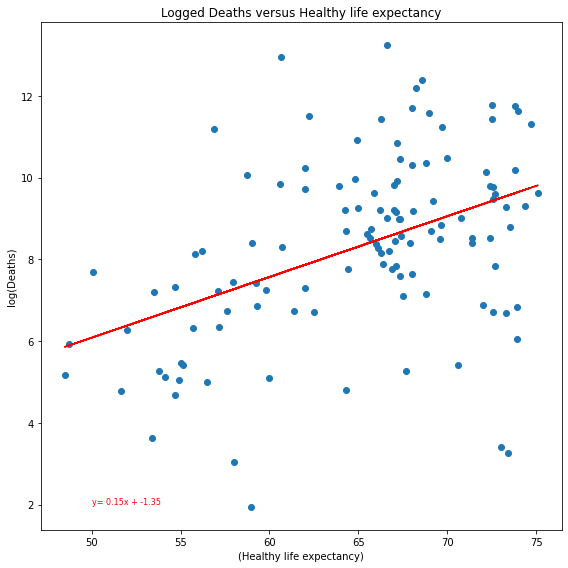

In [10]:
plt.rcParams['figure.figsize'] = [8, 8]
x_values = Together_merge_2021_df['Healthy life expectancy_x']
y_values = np.log(Together_merge_2021_df['Deaths'])
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq_1 = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_1,(50,2),fontsize =8, color='red')
plt.xlabel('(Healthy life expectancy)')
plt.ylabel('log(Deaths)')
plt.title('Logged Deaths versus Healthy life expectancy')
print(f'The r-squared is: {rvalue ** 2}')
plt.tight_layout()
plt.savefig('deaths_vs_life_expectancy_2021.png')
plt.show()

In [11]:
happiness_2020_file = "WHR2020_Data.csv"

#Read df into pandas 
happiness_2020_df = pd.read_csv(happiness_2020_file)
happiness_2020_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [12]:
Together_merge_2020_With_countries_df = pd.merge(happiness_2020_df, country_case_df, on="Country name", how="outer")
Together_merge_2020_With_countries_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy_x,Freedom to make life choices,...,sq_km_area,Healthy life expectancy_y,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,338145.0,77.4,164,Europe,FI,Nordic Countries,246.0,Helsinki [Helsingfors],1.961859,0.017816
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,43094.0,76.5,34,Europe,DK,Nordic Countries,208.0,Copenhagen,5.588369,0.044510
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,41284.0,79.6,"1,350",Europe,CH,Western Europe,756.0,Bern,8.503334,0.128669
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,103000.0,79.4,557,Europe,IS,Nordic Countries,352.0,Reykjav,2.457429,0.008955
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,323877.0,78.7,460,Europe,NO,Nordic Countries,578.0,Oslo,2.615080,0.015060


In [13]:
condensed_question_10_2020_df = Together_merge_2020_With_countries_df.groupby(["Country name","Healthy life expectancy_x"]).sum()[["Deaths"]]
condensed_question_10_2020_df.head()

,,Deaths
Country name,Healthy life expectancy_x,
Afghanistan,52.590000,6804.0
Albania,68.708138,2457.0
Algeria,65.905174,4370.0
Argentina,68.803802,106447.0
Armenia,66.750656,4621.0


In [14]:
Together_merge_2020_With_countries_df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy_x                     float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [15]:
Together_merge_2020_With_countries_df.dropna(inplace=True)

The r-squared is: 0.2080281961957922


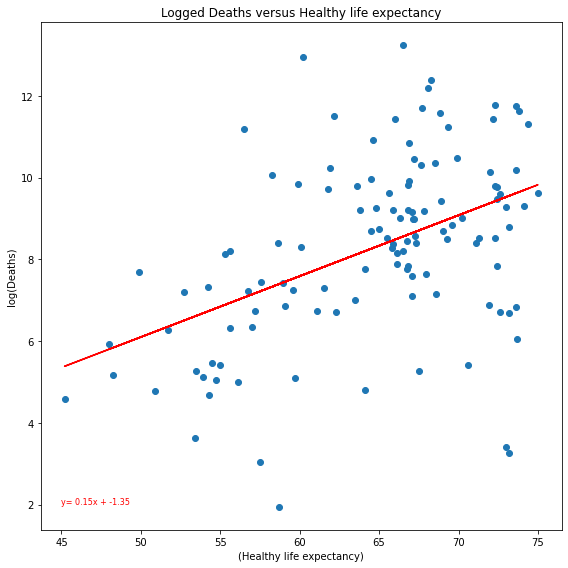

In [16]:
plt.rcParams['figure.figsize'] = [8, 8]
x_values = Together_merge_2020_With_countries_df['Healthy life expectancy_x']
y_values = np.log(Together_merge_2020_With_countries_df['Deaths'])
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq_1 = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_1,(45,2),fontsize =8, color='red')
plt.xlabel('(Healthy life expectancy)')
plt.ylabel('log(Deaths)')
plt.title('Logged Deaths versus Healthy life expectancy')
print(f'The r-squared is: {rvalue ** 2}')
plt.tight_layout()
plt.savefig('deaths_vs_life_expectancy_2020.png')
plt.show()